In [2]:
from ff_k_center import FFKCenter
import numpy as np

### Prepare data:

Create model with k=4, privacy_bound = 1 and representative intervals (1,13) for color class 0 and no restrictions for other color classes:

In [3]:
model = FFKCenter(4,1,[(1,13)]) # parameters: k, privacy_bound = 1, rep_intervals = []

Load data in for of positions in the Eucleadean space (here dim = 2) and color labels for each point. Normal python arrays or numpy-arrays are fine.
model.fit() loads the data and executes the algorithm afterwards.

In [4]:
pos = np.array([[1,2],[0,0],[6,7],[0,-1],[-2,-3],[0,-1.2],[1,3],[6,1]])
colors = np.array([0,0,0,1,1,0,0,1])

### Execute algorithm:

In [5]:
model.fit(pos, colors, verbose = 2, thread_count = 6, phase_2_rerun = True, phase_5_gonzalez = False) 
# Parameters: positions of points, colors of points; Optional: verbose (0: silent, 1: brief, 2: verbose; default: 1); thread_count (default: #cores); phase_2_rerun (default: True); phase_5_gonzalez (default: False);


**** Solving: Clustering-Problem with k = 4, privacy_bound = 1 and representative_intervals: (1,13).

  - Assertions done (time: 207.4µs): ClusteringProblem seems well stated.

  - Phase 1 done (time: 16.32µs): Determined k = 4 centers by the Gonzalez heuristic: (0, 2, 4, 7).

  - Phase 2 done (time: 2.126866ms): Determined k = 4 clusterings:
	C_0:	radius = 7.071068;
	C_1:	radius = 5.8309517;
	C_2:	radius = 5.0990195;
	C_3:	radius = 2.828427;

  - Phase 3 done (time: 52.888µs): Determined the following opening lists:
	C_0:
		(8) for forrest_radius = 0;
	C_1:
		(7, 1) for forrest_radius = 0;
		(7, 1) for forrest_radius = 7.071068;
	C_2:
		(4, 1, 3) for forrest_radius = 0;
		(4, 1, 3) for forrest_radius = 5.8309517;
		(4, 1, 3) for forrest_radius = 7.071068;
	C_3:
		(3, 1, 3, 1) for forrest_radius = 0;
		(3, 1, 3, 1) for forrest_radius = 5.0990195;
		(3, 1, 3, 1) for forrest_radius = 5.8309517;
		(3, 1, 3, 1) for forrest_radius = 6;

  - Phase 4 done (time: 788.367µs with 6 threads on 8

### Read results:

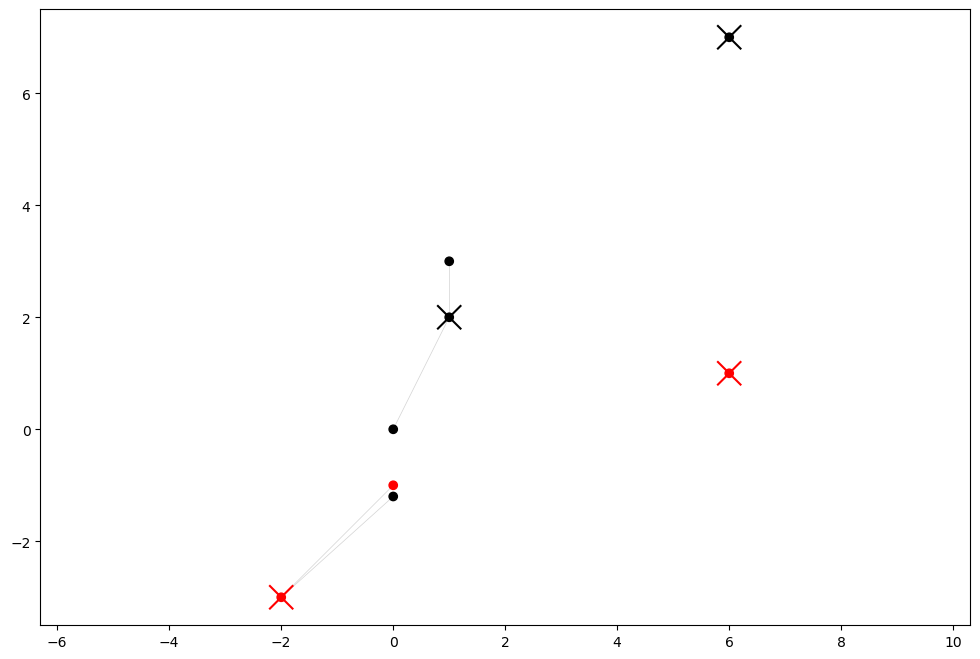

In [6]:
model.plot2d() # for this matplotlib must be installed

In [7]:
model.radius # the final radius of the assignment

2.8284270763397217

In [8]:
model.centers # Chosen centers by the point-index.

[0, 2, 4, 7]

In [9]:
model.assignment # for each point the center it is assigned to.

[0, 0, 2, 4, 4, 4, 0, 7]

In [10]:
model.number_of_centers

4

In [11]:
model.cluster_labels # for each point a cluster_label (= index of the center it is assigned to, enumerated from 0,...,m-1)

[0, 0, 1, 2, 2, 2, 0, 3]

In [12]:
model.running_time # running_time in secs.

0.005180099

### Reading parameters of the model:

In [13]:
model.k

4

In [14]:
model.rep_intervals

[(1, 13)]

In [15]:
model.privacy_bound

1

In [16]:
model.data

[[1.0, 2.0],
 [0.0, 0.0],
 [6.0, 7.0],
 [0.0, -1.0],
 [-2.0, -3.0],
 [0.0, -1.2000000476837158],
 [1.0, 3.0],
 [6.0, 1.0]]

In [17]:
model.colors

[0, 0, 0, 1, 1, 0, 0, 1]

### Modifying the model:
By writing, the computed clustering is removed and needs to be recomputed via model.compute_clustering() or model.fit().

In [18]:
model.k = 2

In [19]:
model.rep_intervals = [(1,2),(1,7),(0,3)]

In [ ]:
model.privacy_bound = 3

As the data is still contained in the model, we can run the following command to compute a new assignment:

In [ ]:
model.compute_clustering(verbose = 1, thread_count = 4) # Optional: verbose (0: silent, 1: brief, 2: verbose; default: 1); thread_count (default: #cores); phase_2_rerun (default: True); phase_5_gonzalez (default: False);

In [ ]:
model.plot2d()

### Loading from and saving to files:

In [ ]:
model.load_space_from_file("test_instance.2dspace", expected = 40) # expected is optional. Default is 1000.

In [ ]:
model.set_problem_parameters(k=4,rep_intervals=[(1,4),(3,4)],privacy_bound=5)
model.compute_clustering(verbose = 0, thread_count = 4)
model.plot2d()

In [ ]:
model.save_clustering_to_file("test_result.clustering")

### Find private assignment for a given set of centers:

In [ ]:
model2 = FFKCenter(4,privacy_bound = 3) # note that this k=4 will be ignored, as we provide centers instead
model2.load_space_from_file("test_instance.3dspace")
model2.private_assignment_by_centers([0,1,3], thread_count = 2) # Centers by point indices. Optional: thread_count (default: #cores);
model2.plot2d(x_dim = 2, y_dim = 0) # the dimension of the dataset is 3, hence we can choose with these two optional parameters which, dimensions should be plotted (default: x_dim = 0, y_dim = 1)